# **Visualización**
# AE02. Matplotlib Heatmap y Dispersion

## <font color='blue'>Tablas de contingencia</font>

El método `pd.crosstab` nos permitirá realizar tablas de contingencia pasando como argumentos las series o arreglos donde tendremos nuestros datos categóricos. Por defecto, realizará el conteo de la co-ocurrencia de las variables categóricas, pero se pueden utilizar otras funciones de agregación
```python
pd.crosstab(serie1, serie2)
```

[Documentación crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

Ejemplo en el cual se va a guardar una tabla de contingencia en la variable `contigency`:



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
%matplotlib inline

In [ ]:
var1 = ['a', 'a', 'c', 'c', 'b', 'b', 'a', 'a', 'c', 'b']
var2 = ['d', 'e', 'f', 'd', 'e', 'f', 'd', 'f', 'e', 'e']

contingency = pd.crosstab(pd.Series(var1),
                          pd.Series(var2),
                          rownames=["var1"],
                          colnames=["var2"])
contingency

var2,d,e,f
var1,,,
a,2,1,1
b,0,2,1
c,1,1,1


# <font color='blue'>Mapas de calor (Heatmap)</font>

una forma de visualizar tablas (como la anterior), corresponde a un mapa de calor. Esta visualización utiliza la intensidad de color para codificar los valores existentes en las tablas. En este caso, para poder realizar un mapa de calor utilizando matplotlib necesitamos invocar el método `plt.pcolormesh()`. Este recibe como argumento un arreglo bidimensional y nos devuelve un objeto artista, relacionado a nuestro mapa de calor.

[Documentación pcolormesh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html)


In [ ]:
contingency.values

array([[2, 1, 1],
       [0, 2, 1],
       [1, 1, 1]])

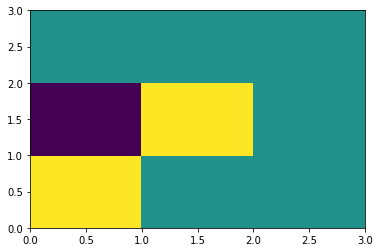

In [ ]:
z = contingency.values # Obtenemos una representación matricial de la matriz de contingencia
heatmap = plt.pcolormesh(z) # Generamos el mapa de calor y guardamos el artista en la variable heatmap

Utilizaremos ahora el método `plt.colorbar` para añadir la barra de color a nuestro mapa de calor. Con esto podremos añadir la referencia para la escala de color, asociada a los valores pertenecientes a las tablas. Este método recibe el artista asociado al mapa de calor para extraer los valores de color y asociarlos en la barra.

[Documentación colorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.colorbar.html?highlight=colorbar#matplotlib.pyplot.colorbar)


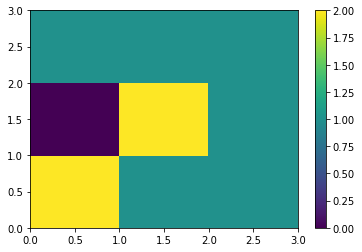

In [ ]:
heatmap = plt.pcolormesh(z) #Generamos el heatmap
cbar = plt.colorbar(heatmap) # Añadimos la barra de color

Aparte de añadir la barra de color, podemos añadir a los ejes, los valores que hacen referencia cada una de las coordenadas. En este caso, en el eje X vamos a tener las valores correspondientes a las columnas (d, e, f), y en el eje Y los valores relacionados a las filas (a, b, c). Para esto utilizamos el método visto en los gráficos de barras `plt.xticks` y `plt.yticks`

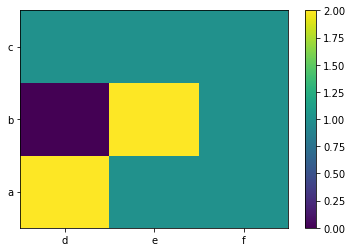

In [ ]:
heatmap = plt.pcolormesh(z)
cbar = plt.colorbar(heatmap)
plt.xticks([0.5, 1.5, 2.5], ["d", "e", "f"])
plt.yticks([0.5, 1.5, 2.5], ["a", "b", "c"])
plt.show()

Podemos añadir información, podemos utilizar el método `plt.text()`, el cual nos permitirá escribir texto en el heatmap. Este recibe 3 parámetros principales: coordenadas (X, Y) y el texto a pintar. En este caso, el texto lo vamos a sacar de la matrix `z[i, j]` (los valores obtenidos de la tabla de contingencia). Para poder pintar necesitaremos de los dos ciclos for, principalmente para escribir en los 9 cuadrados de los mapas de calor. Además de esto, añadiremos los títulos para el gráfico y los ejes X e Y. 

[Documentación plt.text](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html?highlight=pyplot%20text#matplotlib.pyplot.text)


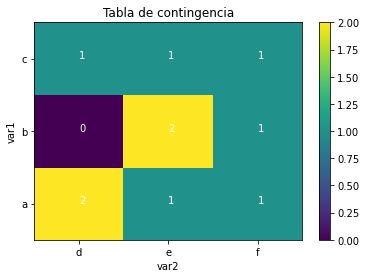

In [ ]:
heatmap = plt.pcolormesh(z)
cbar = plt.colorbar(heatmap)
plt.xticks([0.5, 1.5, 2.5], ["d", "e", "f"])
plt.yticks([0.5, 1.5, 2.5], ["a", "b", "c"])
for i in range(3):
    for j in range(3):
        text = plt.text(j + 0.5, i + 0.5, z[i, j], color="white")
plt.title("Tabla de contingencia")
plt.ylabel("var1")
plt.xlabel("var2")
plt.show()

# <font color='blue'>Manejo de marcadores y diagramas de dispersión</font>

Para poder ver como varían los distintos posibles estilos de marcadores, utilizaremos un set de datos conocido. Este corresponde al set de datos de la flor de iris.

[Documentación Estilos de Líneas y marcadores](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html)


In [ ]:
# Montamos nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
iris_path = "/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos/VD03.csv"
#iris_path = "/content/drive/MyDrive/VGroup/Viz/Archivos/VD03.csv"
iris_df = pd.read_csv(iris_path)
iris_df.drop(["Id"],inplace=True,axis="columns")
iris_df.sample(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
70,5.9,3.2,4.8,1.8,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor


Guardaremos las columnas numéricas en distintas variables

In [ ]:
sl = iris_df['SepalLengthCm'].values
sw = iris_df['SepalWidthCm'].values
pl = iris_df['PetalLengthCm'].values
pw = iris_df['PetalWidthCm'].values

Luego graficaremos el comportamiento de una de estas utilizando el método `plt.plot`. Al pasar solo el eje X, este lo interpretará, y graficará los valores como una serie desde el índice $0$, hasta `len(columna)`.

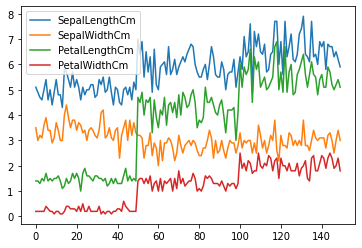

In [ ]:
#Se prueba con las diferentes variables

plt.plot(sl, label = 'SepalLengthCm') #
plt.plot(sw, label = 'SepalWidthCm') #
plt.plot(pl, label = 'PetalLengthCm') #
plt.plot(pw, label = 'PetalWidthCm') #

plt.legend()
plt.show()


Si después de pasar los datos, agregamos un estilo definidos en la documentación (ejemplo: '--'), vamos a tener diagrama de línea punteado

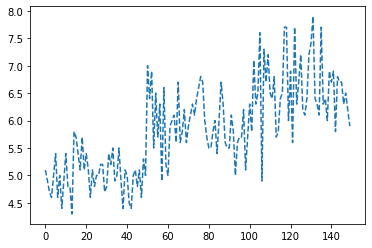

In [ ]:
plt.plot(sl, "--")
plt.show()

Ejemplo de otro estilo, punto y línea (".-"):

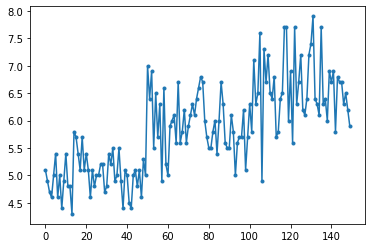

In [ ]:
plt.plot(sl, ".-")
plt.show()

Ahora si graficamos dos variables sin especificar el estilo vamos a obtener algo bastante interesante:

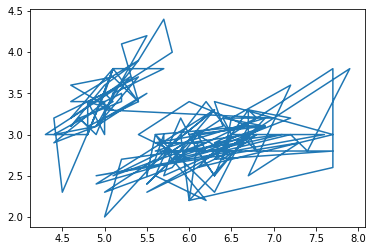

In [ ]:
plt.plot(sl, sw)
plt.show()

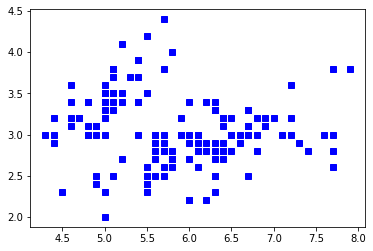

In [ ]:
# agreguemos unos marcadores para una mejor visualización

plt.plot(sl, sw, 'bs')
plt.show()

Para evitar esto, tenemos que definir nuevamente un estilo de marcador, como estamos en análisis bivariado, podemos utilizar un ...

# <font color='blue'>Diagrama de dispersión</font>
Utilizando el método `plt.plot` y definiendo como tercer argumento un estilo de marcador podemos generar nuestros diagramas de dispersión y ver cómo se comportan una variable con respecto a otra.

[Marcadores](https://matplotlib.org/3.3.0/api/markers_api.html)


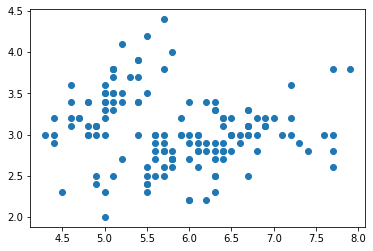

In [ ]:
plt.plot(sl, sw, 'o') # 'o' es igual a decir un círculo como marcador
plt.show()

Alternativamente podemos utilizar el método `plt.scatter()`:

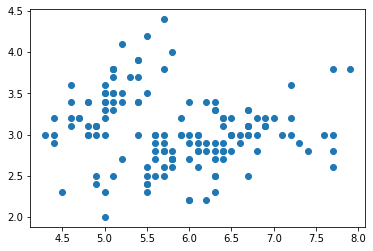

In [ ]:
plt.scatter(sl, sw)
plt.show()

Podemos añadir color utilizando el parámetro color:

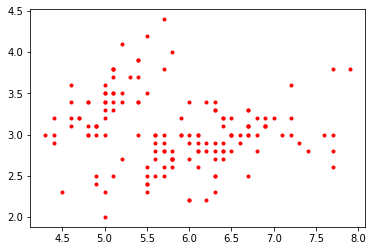

In [ ]:
plt.plot(sl, sw, '.', color="red")
plt.show()

O en su defecto, al principio del marcador la inicial del color, seguido por el marcador (en este caso "ro" = "red points")

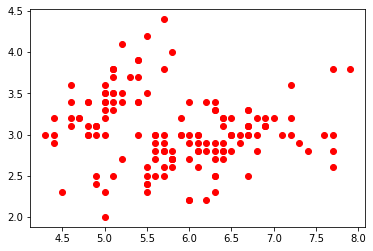

In [ ]:
plt.plot(sl, sw, 'ro')
plt.show()

Si aplicamos al parámetro `alpha`, podemos darle transparencia a los puntos y observar, de mejor forma, el potencial solpamiento que tienen.

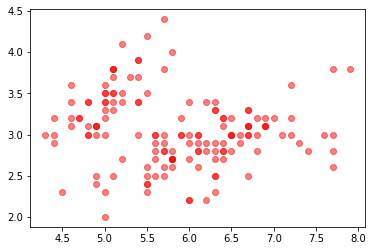

In [ ]:
plt.plot(sl, sw, 'ro', alpha=0.5)
plt.show()

un último ejemplo: diamantes rojos

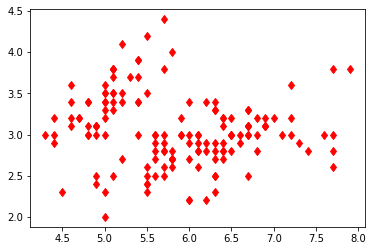

In [ ]:
plt.plot(sl, sw,'rd')
plt.show()

# <font color='blue'>Matriz de correlación</font>

Siguiendo con el análisis bivariado, podemos analizar la correlación existente entre variables. Esta correlación nos dará las dependencias lineales entre pares de variables. Para esto podemos programar nuestra propia función la cual compute lo siguiente:

$$ \rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X\sigma_Y}$$ 
donde
$$ cov(X,Y) = \frac{\sum (X-\bar{X})(Y-\bar{Y})}{N}$$

es la Covarianza de $X$ e $Y$, y $\sigma_X$ y $\sigma_Y$ correspondena las desviaciones estándas de las variables.

Entonces, la matriz de correlación va a ser una matriz simétrica, donde cada casilla consiste en la correlación de los posibles pares de variables dentro de nuestro set de datos. En este caso, tendríamos una matriz de $4x4$ si es que tomamos como ejemplo el set de datos de iris. Generaremos una matriz con Numpy inicializada en ceros.


In [ ]:
corr = np.zeros((4,4))
corr = corr*np.nan
corr 

array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]])

Luego, definiremos la función de correlación el cual va a recibir dos arreglos de Numpy, y luego computamos las fórmulas que mencionamos anteriormente. Además, como la matriz es simétrica solo vamos a llenar la diagonal superior de dicha matriz. Finalmente imprimimos la matriz.

In [ ]:
def correlation(X,Y):
    cov = np.sum((X - np.mean(X)) * (Y - np.mean(Y))) * 1/(len(Y))
    correlation_value = cov / (np.std(X) * np.std(Y))
    return correlation_value

corr[0,0] = correlation(sl, sl)
corr[0,1] = correlation(sl, sw)
corr[0,2] = correlation(sl, pl)
corr[0,3] = correlation(sl, pw)

corr[1,1] = correlation(sw, sw)
corr[1,2] = correlation(sw, pl)
corr[1,3] = correlation(sw, pw)

corr[2,2] = correlation(pl, pl)
corr[2,3] = correlation(pl, pw)

corr[3,3] = correlation(pw, pw)
corr

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [        nan,  1.        , -0.4205161 , -0.35654409],
       [        nan,         nan,  1.        ,  0.9627571 ],
       [        nan,         nan,         nan,  1.        ]])

Aprovechemos los mapas de calor y mostremos la matriz de correlación utilizando esta representación

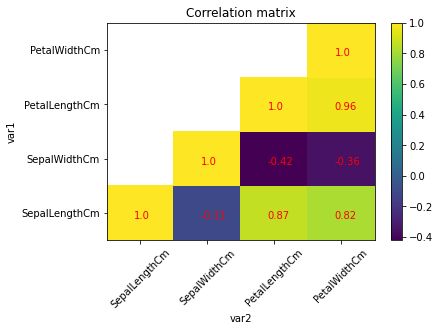

In [ ]:
heatmap = plt.pcolormesh(corr)
cbar = plt.colorbar(heatmap)

columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
plt.xticks([0.5, 1.5, 2.5, 3.5], columns, rotation=45)
plt.yticks([0.5, 1.5, 2.5, 3.5], columns)
for i in range(4):
    for j in range(4):
        if np.isnan(corr[i, j]): 
            #la matriz de correlación es simetrica, si no estan calculado 
            #mejor no presentarlo en la figura y dejalo como casillero en blanco. 
            continue
        else:
            text = plt.text(j + 0.4, i + 0.4, corr[i, j].round(2), color="red",)
plt.title("Correlation matrix")
plt.ylabel("var1")
plt.xlabel("var2")
plt.show()



Alternativamente y de forma mucho más sencilla, si tenemos un DataFrame podemos utilizar el método `.corr()` para obtener un nuevo DataFrame. Este DataFrame va a tener la matriz de correlación:

In [ ]:
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [ ]:
corr = iris_df.corr().values
corr

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

Luego podemos graficar utilizando un heatmap

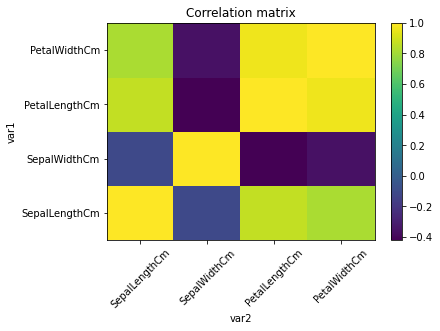

In [ ]:
heatmap = plt.pcolormesh(corr)
cbar = plt.colorbar(heatmap)

columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
plt.xticks([0.5, 1.5, 2.5, 3.5], columns, rotation=45)
plt.yticks([0.5, 1.5, 2.5, 3.5], columns)
plt.title("Correlation matrix")
plt.ylabel("var1")
plt.xlabel("var2")
plt.show()

Añadimos títulos, nombres de variables y texto a cada casilla del mapa de calor

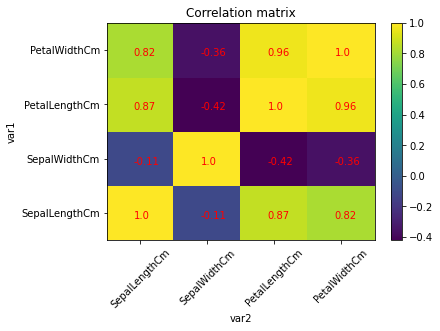

In [ ]:
heatmap = plt.pcolormesh(corr)
cbar = plt.colorbar(heatmap)

columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
plt.xticks([0.5, 1.5, 2.5, 3.5], columns, rotation=45)
plt.yticks([0.5, 1.5, 2.5, 3.5], columns)
for i in range(4):
    for j in range(4):
        text = plt.text(j + 0.4, i + 0.4, corr[i, j].round(2), color="red",)
plt.title("Correlation matrix")
plt.ylabel("var1")
plt.xlabel("var2")
plt.show()

# <font color='blue'>Guardar la figura</font>

Para poder guardar una figura, podemos utilizar el método `plt.savefig()`. Este como primer argumento recibirá el nombre del archivo que nosotros queremos guardar. En este caso, vamos a guardar la matriz de correlación generada en el archivo `"Correlation_matrix.png"`


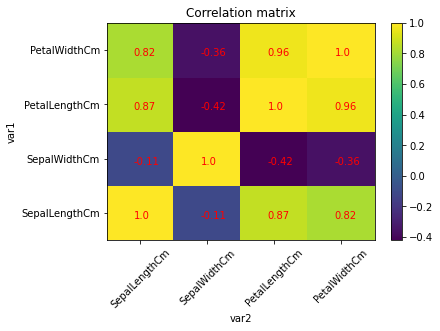

In [ ]:
heatmap = plt.pcolormesh(corr)
cbar = plt.colorbar(heatmap)

columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
plt.xticks([0.5, 1.5, 2.5, 3.5], columns, rotation=45)
plt.yticks([0.5, 1.5, 2.5, 3.5], columns)
for i in range(4):
    for j in range(4):
        text = plt.text(j + 0.4, i + 0.4, corr[i, j].round(2), color="red",)
plt.title("Correlation matrix")
plt.ylabel("var1")
plt.xlabel("var2")
plt.savefig("Correlation_matrix.png")
plt.show()

Para aumentar la Resolución de la figura podemos utilizar el parámetro `dpi`, el cual hace referencia a "Dots per Inch" o Puntos por Pulgada. Mientras más alto sea este número, mayor va a ser la resolución de salida para la imagen.

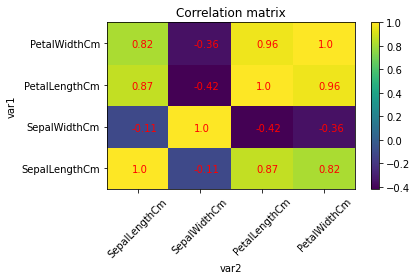

In [ ]:
heatmap = plt.pcolormesh(corr)
cbar = plt.colorbar(heatmap)

columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
plt.xticks([0.5, 1.5, 2.5, 3.5], columns, rotation=45)
plt.yticks([0.5, 1.5, 2.5, 3.5], columns)
for i in range(4):
    for j in range(4):
        text = plt.text(j + 0.4, i + 0.4, corr[i, j].round(2), color="red",)
plt.title("Correlation matrix")
plt.ylabel("var1")
plt.xlabel("var2")

plt.tight_layout() #es para evitar que se corte el texto
plt.savefig("Correlation_matrix2.jpg", dpi=300)
plt.show()

## <font color='green'>Actividad 1:</font>

Utilizaremos una base de datos especificamente: Los pingüinos de Palmer:

<center><img src="https://drive.google.com/uc?id=1gCG9wP4iAKh-0bNX-uQB9X6K5nlTnDgG" alt="drawing" width=600px/></center>

El set de datos de los pingüinos, específicamente “Palmer Penguins”, corresponde a un set de datos libre de uso. La idea es presentar una alternativa a un set de datos de similares características: El set de datos de Iris. En este caso, se tomaron diferentes medidas para 344 pingüinos en el archipiélago de Palmer en la Antártica. Las medidas que se tomaron fueron: “Bill Length”, “Bill Depth”, “Flipper Length” y “Body Mass” .
<center><img src="https://drive.google.com/uc?id=1DNeukLYfpfYWgz1r7XBEL_nV1905ltdM" alt="drawing" width=500px/><img src="https://drive.google.com/uc?id=1y5xWqxYDgU_FDm8WAJvXuIlFOhOHgC15" alt="drawing" width=600px/></center>

1.- Obtener la matriz de correlación y graficarla

2.- Graficar utilizando diagramas de dispersión pares de variables con: Alta Correlación, Nula Correlación y Correlación Negativa

3.- Generar tres histogramas para las posibles variables que existen en el set de datos

4.- Generar un gráfico de barras con la cantidad de pingüinos en cada isla

5.- Generar un gráfico de torta con la cantidad de pingüinos según especie

6.- Generar una tabla de contingencia con la cantidad de según especies e islas, y luego graficarlas



**Nota:** Para el punto 4, una pequeña ayuda puede ser la función: `np.unique(x, return_counts=True)` 

[Documentación np.unique](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)



In [ ]:
# Tu código aquí ...

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# penguins_df = pd.read_csv("../Archivos/VD02.csv").dropna()
penguins_df = pd.read_csv("/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


[[ 1.         -0.22862564  0.65309564  0.58945111]
 [-0.22862564  1.         -0.5777917  -0.47201566]
 [ 0.65309564 -0.5777917   1.          0.8729789 ]
 [ 0.58945111 -0.47201566  0.8729789   1.        ]]


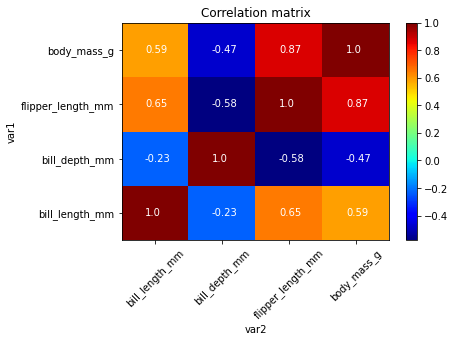

In [ ]:
# 1.- Obtener la matriz de correlación y graficarla
# Las medidas que se tomaron fueron: “Bill Length”, “Bill Depth”, “Flipper Length” y “Body Mass” 

corr = penguins_df.corr().values
print(corr)

heatmap = plt.pcolormesh(corr, cmap = "jet")
cbar = plt.colorbar(heatmap)

# bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g
columns = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
plt.xticks([0.5, 1.5, 2.5, 3.5], columns, rotation=45)
plt.yticks([0.5, 1.5, 2.5, 3.5], columns, rotation=0)
for i in range(4):
    for j in range(4):
        text = plt.text(j + 0.35, i + 0.45, corr[i, j].round(2), color="white",)
plt.title("Correlation matrix")
plt.ylabel("var1")
plt.xlabel("var2")
plt.show()


In [ ]:
penguins_df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


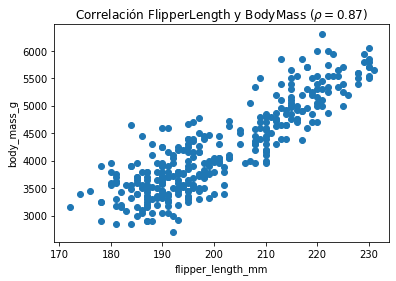

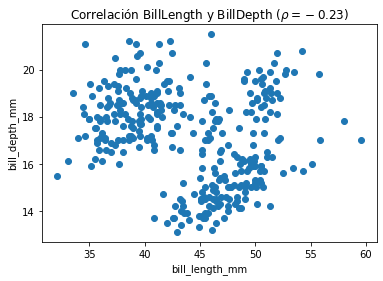

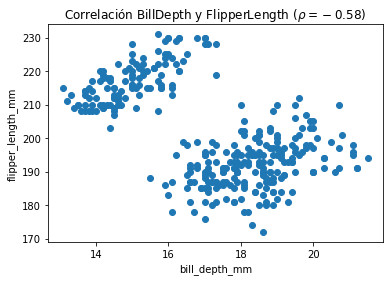

In [ ]:
# 2.- Graficar utilizando diagramas de dispersión pares de variables con: Alta Correlación, Nula Correlación y Correlación Negativa
# bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g
bl = penguins_df['bill_length_mm'].values
bd = penguins_df['bill_depth_mm'].values
fl = penguins_df['flipper_length_mm'].values
bm = penguins_df['body_mass_g'].values

# Alta Correlación (rho = 0.872979) = FlipperLength y BodyMass
plt.scatter(fl, bm)
plt.xlabel('flipper_length_mm')
plt.ylabel("body_mass_g")
plt.title('Correlación FlipperLength y BodyMass ($\\rho = 0.87$)')
plt.show()

# Correlación Negativa cercana a cero (rho = -0.228626)   = BillLength y BillDepth, y,
plt.scatter(bl, bd)
plt.xlabel('bill_length_mm')
plt.ylabel("bill_depth_mm")
plt.title('Correlación BillLength y BillDepth ($\\rho = -0.23$)')
plt.show()

# Correlación Negativa (rho = -0.577792) = BillDepth y FlipperLength
plt.scatter(bd, fl)
plt.xlabel('bill_depth_mm')
plt.ylabel("flipper_length_mm")
plt.title('Correlación BillDepth y FlipperLength ($\\rho = -0.58$)')
plt.show()

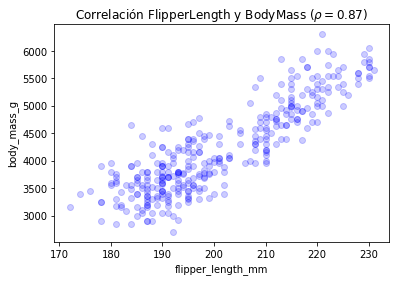

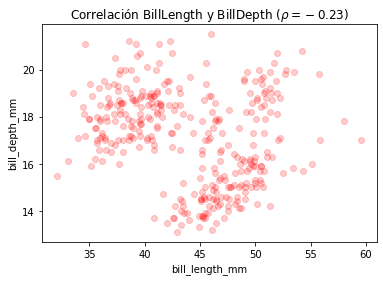

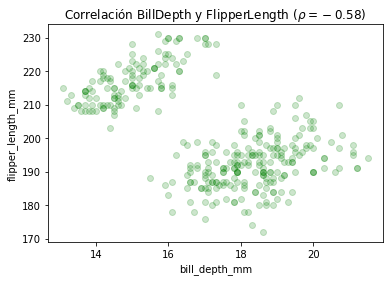

In [ ]:
# 2b.- Otra alternativa
# bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g
bl = penguins_df['bill_length_mm'].values
bd = penguins_df['bill_depth_mm'].values
fl = penguins_df['flipper_length_mm'].values
bm = penguins_df['body_mass_g'].values

# Alta Correlación (rho = 0.872979) = FlipperLength y BodyMass
plt.plot(fl, bm, 'o', alpha=0.2, color="blue")
plt.xlabel('flipper_length_mm')
plt.ylabel("body_mass_g")
plt.title('Correlación FlipperLength y BodyMass ($\\rho = 0.87$)')
plt.show()

# Correlación Negativa cercana a cero (rho = -0.228626)   = BillLength y BillDepth, y,
plt.plot(bl, bd, 'o', alpha=0.2, color="red")
plt.xlabel('bill_length_mm')
plt.ylabel("bill_depth_mm")
plt.title('Correlación BillLength y BillDepth ($\\rho = -0.23$)')
plt.show()

# Correlación Negativa (rho = -0.577792) = BillDepth y FlipperLength
plt.plot(bd, fl, 'o', alpha=0.2, color="green")
plt.xlabel('bill_depth_mm')
plt.ylabel("flipper_length_mm")
plt.title('Correlación BillDepth y FlipperLength ($\\rho = -0.58$)')
plt.show()

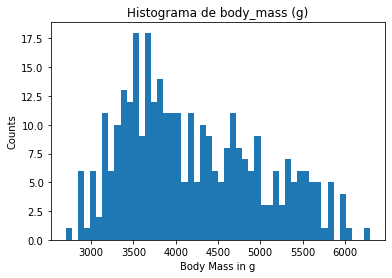

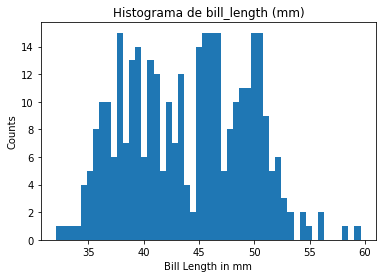

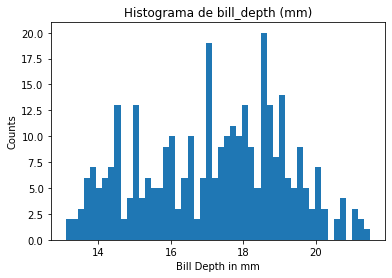

In [ ]:
# 3.- Generar tres histogramas para las posibles variables que existen en el set de datos

# bl = penguins_df['bill_length_mm'].values
# bd = penguins_df['bill_depth_mm'].values
# fl = penguins_df['flipper_length_mm'].values
# bm = penguins_df['body_mass_g'].values

num_bins = 50 # Definimos la cantidad de cajas para nuestro histograma
n, bins, patches = plt.hist(bm, num_bins)
plt.title('Histograma de body_mass (g)')
plt.xlabel('Body Mass in g')
plt.ylabel('Counts')
plt.show()
# print(n)

num_bins = 50 # Definimos la cantidad de cajas para nuestro histograma
n, bins, patches = plt.hist(bl, num_bins)
plt.title('Histograma de bill_length (mm)')
plt.xlabel('Bill Length in mm')
plt.ylabel('Counts')
plt.show()

num_bins = 50 # Definimos la cantidad de cajas para nuestro histograma
n, bins, patches = plt.hist(bd, num_bins)
plt.title('Histograma de bill_depth (mm)')
plt.xlabel('Bill Depth in mm')
plt.ylabel('Counts')
plt.show()


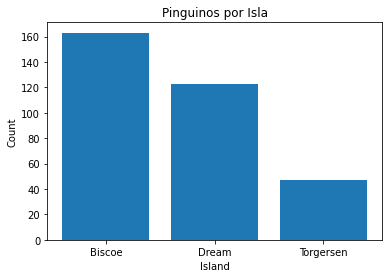

In [ ]:
# 4.- Generar un gráfico de barras con la cantidad de pingüinos en cada isla
# Nota: Para el punto 4, una pequeña ayuda puede ser la función: np.unique(x, return_counts=True)

island_str, island_count = np.unique(penguins_df['island'], return_counts=True)

rects = plt.bar(island_str, island_count)

plt.title('Pinguinos por Isla')
plt.ylabel('Count')
plt.xlabel('Island')

plt.show()


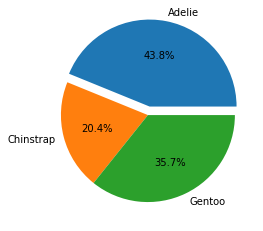

In [ ]:
# 5.- Generar un gráfico de torta con la cantidad de pingüinos según especie

species_str, species_count = np.unique(penguins_df['species'], return_counts=True)

explode=[0.1, 0.0, 0.0]

rects = plt.pie(species_count,labels=species_str,
        autopct='%.1f%%',
        explode=explode)

plt.show()


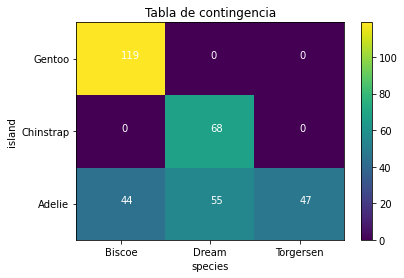

In [ ]:
# 6.- Generar una tabla de contingencia con la cantidad de según especies e islas, y luego graficarlas

#crear tabla de contingencia
contingency = pd.crosstab(penguins_df['species'],
                          penguins_df['island'],
                          rownames=["species"],
                          colnames=["island"])
#extraer valores de la tabla
z = contingency.values
row_names = contingency.index
col_names = contingency.columns

heatmap = plt.pcolormesh(z)
cbar = plt.colorbar(heatmap)
plt.xticks([0.5, 1.5, 2.5], col_names)
plt.yticks([0.5, 1.5, 2.5], row_names)
for i in range(3):
    for j in range(3):
        text = plt.text(j + 0.5, i + 0.5, z[i, j], color="white")

#agregar titulos y labels
plt.title("Tabla de contingencia")
plt.ylabel("island")
plt.xlabel("species")
plt.show()


In [ ]:
contingency

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,55,47
Chinstrap,0,68,0
Gentoo,119,0,0


<font color='green'>Fin actividad 1</font>